# Stroke Death Prediction

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Load the data

In [6]:
raw_df = pd.read_csv('./healthcare-dataset-stroke-data.csv')
raw_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Data Overview

In [7]:
raw_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
raw_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Visualization

##### Checking Null Values

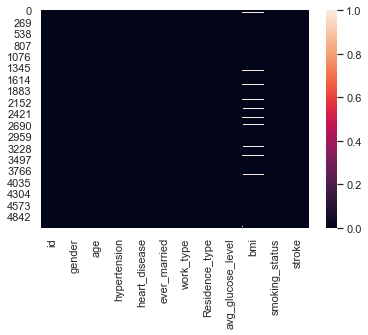

In [10]:
sns.heatmap(raw_df.isnull())

##### Stroke and Gender Relationship

In [11]:
raw_df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

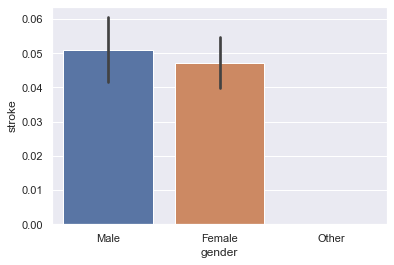

In [12]:
sns.barplot(x='gender',y='stroke',data=raw_df)

##### Stroke and Age Relationship

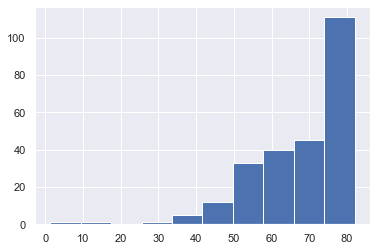

In [13]:
plt.hist(raw_df['age'][raw_df['stroke']==1])
plt.show()

##### Stroke and Hypertension Relationship

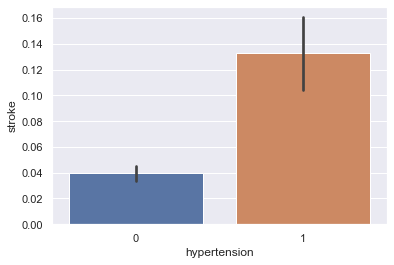

In [14]:
sns.barplot(x='hypertension',y='stroke',data=raw_df)

##### Stroke and Marriage Relationship

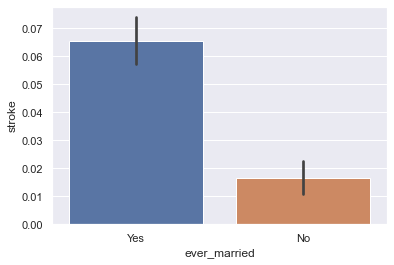

In [15]:
sns.barplot(x='ever_married',y='stroke',data=raw_df)

##### Stroke and Worktype Relationship

In [16]:
raw_df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

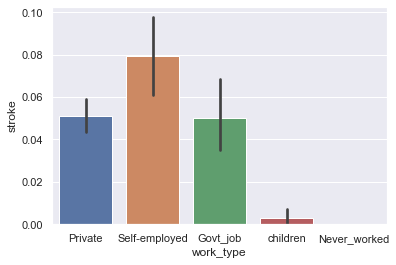

In [17]:
sns.barplot(x='work_type',y='stroke',data=raw_df)

##### Stroke and Worktype Relationship

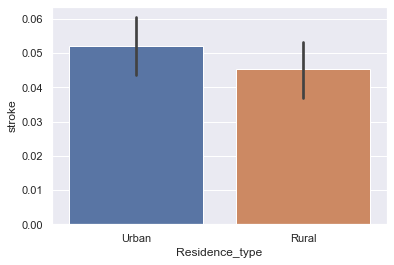

In [18]:
sns.barplot(x='Residence_type',y='stroke',data=raw_df)

##### Stroke and Smoking Status Relationship

In [19]:
raw_df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

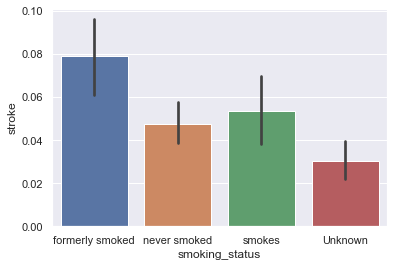

In [20]:
sns.barplot(x='smoking_status',y='stroke',data=raw_df)

##### Stroke and Heart Disease Relationship

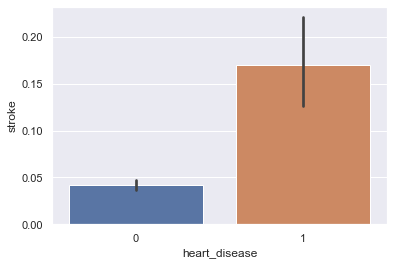

In [21]:
sns.barplot(x='heart_disease',y='stroke',data=raw_df)

##### Stroke and Avg. Glocose Lvl Relationship

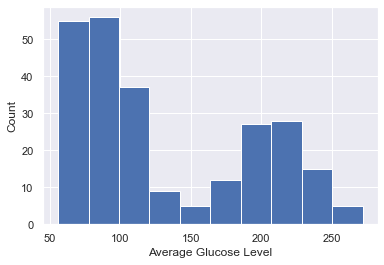

In [22]:
plt.hist(raw_df['avg_glucose_level'][raw_df['stroke']==1])
plt.xlabel('Average Glucose Level')
plt.ylabel('Count')
plt.show()

## Feature Engineering

In [23]:
df = raw_df.copy()

In [24]:
df.columns.values

array(['id', 'gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'], dtype=object)

##### Dropping ID

In [25]:
df.drop('id',axis=1,inplace=True)

##### Dropping NA values

In [26]:
df.dropna(inplace=True)

##### Dropping Other gender because of only one row

In [27]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [28]:
df[df['gender']=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [29]:
df.drop(df[df['gender']=='Other'].index,inplace=True)

In [30]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

### Categorical to Numerical

##### Married

In [31]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
lb = LabelBinarizer()

In [33]:
df['ever_married'] = lb.fit_transform(df['ever_married'])

In [34]:
df['ever_married'].unique()

array([1, 0])

##### Gender

In [35]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [36]:
le = LabelEncoder()

In [37]:
df['gender'] = le.fit_transform(df['gender'])

In [38]:
df['gender'].unique()

array([1, 0])

##### Residence Type

In [39]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [40]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
2,1,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,1,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [41]:
le = LabelEncoder()
df['Residence_type'] = le.fit_transform(df['Residence_type'])

In [42]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
5,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1


In [43]:
df['Residence_type'].unique()

array([1, 0])

##### BMI

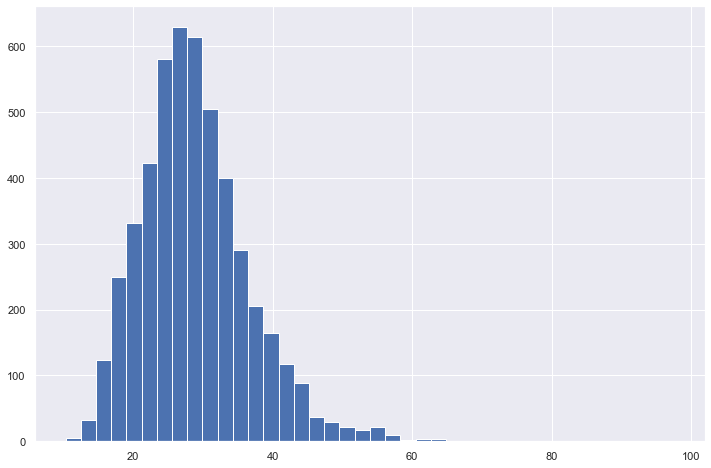

In [44]:
plt.figure(figsize=(12,8))
plt.hist(df['bmi'],bins=40)
plt.show()

### BMI > 40 & BMI < 15 are outliers

In [45]:
df = df[df['bmi']<=40]

In [46]:
df = df[df['bmi']>=15]

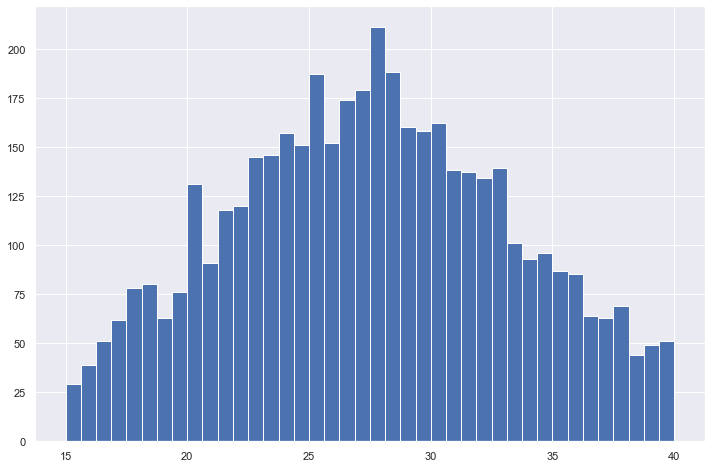

In [47]:
plt.figure(figsize=(12,8))
plt.hist(df['bmi'],bins=40)
plt.show()

In [48]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
5,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1


##### Work Type

In [49]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [50]:
dummy_work_type = pd.get_dummies(df['work_type'],drop_first=True)

In [51]:
dummy_work_type.head()

,Never_worked,Private,Self-employed,children
0,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0
5,0,1,0,0


In [52]:
df = pd.concat((df,dummy_work_type),axis=1)

In [53]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Never_worked,Private,Self-employed,children
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1,0,1,0,0
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1,0,1,0,0
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1,0,1,0,0
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1,0,0,1,0
5,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1,0,1,0,0


In [54]:
df.drop('work_type',axis=1,inplace=True)

##### Smoking Status

In [55]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [56]:
dummy_smoking_status = pd.get_dummies(df['smoking_status'],drop_first=True)

In [57]:
dummy_smoking_status.head()

,formerly smoked,never smoked,smokes
0,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,1,0,0


In [58]:
df = pd.concat((df,dummy_smoking_status),axis=1)

In [59]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,1,67.0,0,1,1,1,228.69,36.6,formerly smoked,1,0,1,0,0,1,0,0
2,1,80.0,0,1,1,0,105.92,32.5,never smoked,1,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,smokes,1,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,never smoked,1,0,0,1,0,0,1,0
5,1,81.0,0,0,1,1,186.21,29.0,formerly smoked,1,0,1,0,0,1,0,0


In [60]:
df.drop('smoking_status',axis=1,inplace=True)

## Preprocessed Data

In [61]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,1,0,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,1,0
5,1,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,1,0,0
6,1,74.0,1,1,1,0,70.09,27.4,1,0,1,0,0,0,1,0
7,0,69.0,0,0,0,1,94.39,22.8,1,0,1,0,0,0,1,0
9,0,78.0,0,0,1,1,58.57,24.2,1,0,1,0,0,0,0,0
10,0,81.0,1,0,1,0,80.43,29.7,1,0,1,0,0,0,1,0
11,0,61.0,0,1,1,0,120.46,36.8,1,0,0,0,0,0,0,1


## Train Test Split

In [62]:
X = df.drop('stroke',axis=1)
y = df['stroke']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Model Training

### Using GridSearchCV to obtain best parameters

In [64]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [66]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
score_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
score_df

,model,best_score,best_params
0,svm,0.954291,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.950646,{'n_estimators': 10}
2,logistic_regression,0.954291,{'C': 1}
3,naive_bayes_gaussian,0.538177,{}
4,naive_bayes_multinomial,0.825292,{}
5,decision_tree,0.924006,{'criterion': 'entropy'}


In [67]:
score_df.sort_values(by=['best_score'], ascending=False)

,model,best_score,best_params
0,svm,0.954291,"{'C': 1, 'kernel': 'linear'}"
2,logistic_regression,0.954291,{'C': 1}
1,random_forest,0.950646,{'n_estimators': 10}
5,decision_tree,0.924006,{'criterion': 'entropy'}
4,naive_bayes_multinomial,0.825292,{}
3,naive_bayes_gaussian,0.538177,{}


### From the above evaluation, Logistic Regression trains with the best score

In [68]:
model = LogisticRegression()

In [69]:
model.fit(X_train,y_train)

LogisticRegression()

## Model Evaluation

In [70]:
y_hat = model.predict(X_test)

In [71]:
confusion_matrix(y_test,y_hat)

array([[864,   0],
       [ 28,   0]], dtype=int64)

In [72]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       864
           1       0.00      0.00      0.00        28

    accuracy                           0.97       892
   macro avg       0.48      0.50      0.49       892
weighted avg       0.94      0.97      0.95       892



In [73]:
print('Accuracy: ',accuracy_score(y_test,y_hat))

Accuracy:  0.968609865470852


# Prediction

In [115]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4458 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4458 non-null   int32  
 1   age                4458 non-null   float64
 2   hypertension       4458 non-null   int64  
 3   heart_disease      4458 non-null   int64  
 4   ever_married       4458 non-null   int32  
 5   Residence_type     4458 non-null   int32  
 6   avg_glucose_level  4458 non-null   float64
 7   bmi                4458 non-null   float64
 8   Never_worked       4458 non-null   uint8  
 9   Private            4458 non-null   uint8  
 10  Self-employed      4458 non-null   uint8  
 11  children           4458 non-null   uint8  
 12  formerly smoked    4458 non-null   uint8  
 13  never smoked       4458 non-null   uint8  
 14  smokes             4458 non-null   uint8  
dtypes: float64(3), int32(3), int64(2), uint8(7)
memory usage: 451.7 KB


In [133]:
pred = {
    'gender':0, #1-male, 0-female
    'age':49.0, 
    'hypertension':0,
    'heart_disease':0,
    'ever_married':1,
    'Residence_type':1, #1-urban, 0-rural
    'avg_glucose_level':94.0,
    'bmi':21.9,
#     'Govt_job':0,
    'Never_worked':1,
    'Private':0,
    'Self-employed':0,
    'children':1,
#     'Unknown':0,
    'formerly smoked':0,
    'never smoked':1,
    'smokes':0
}

In [134]:
pred_gender = pred['gender']
pred_age = pred['age']
pred_hypertension = pred['hypertension']
pred_heart_disease = pred['heart_disease']
pred_ever_married = pred['ever_married']
pred_residence_type = pred['Residence_type']
pred_avg_glucose_level = pred['avg_glucose_level']
pred_bmi = pred['bmi']
pred_never_worked = pred['Never_worked']
pred_private = pred['Private']
pred_self_employed = pred['Self-employed']
pred_children = pred['children']
pred_formerly_smoked = pred['formerly smoked']
pred_never_smoked = pred['never smoked']
pred_smokes = pred['smokes']

In [135]:
data_pred = [[pred_gender, pred_age, pred_hypertension,
              pred_heart_disease, pred_ever_married,
              pred_residence_type, pred_avg_glucose_level,
              pred_bmi, pred_never_worked, pred_private, 
              pred_self_employed, pred_children, pred_formerly_smoked,
              pred_never_smoked, pred_smokes]]

In [136]:
model.predict(data_pred)

array([0], dtype=int64)

# Training Model (Complete Dataset)

In [142]:
model = LogisticRegression()

In [143]:
model.fit(X,y)

LogisticRegression()

### Saving Model

In [147]:
import joblib

In [148]:
joblib.dump(model,'ml_model_stroke_death_prediction')

['model_stroke_death_prediction']

In [ ]:
# model = joblib.load('./model_stroke_death_prediction')